# **Super Resolution**
Notebook no. : 7

**By: Ayush Adarsh**

# Topic 1: Super Resolution




## **1. Bicubic Interpolation**

### Intuition
Bicubic interpolation uses a weighted average of the 16 nearest pixel values to estimate the intensity of a new pixel. It provides smoother results compared to simpler methods like nearest-neighbor or bilinear interpolation.

### Mathematics
#### Intensity Calculation Formula

The intensity of the new pixel at $(x, y)$ is computed as:

$$
I(x, y) = \sum_{i=-1}^{2} \sum_{j=-1}^{2} w(x - i) \cdot w(y - j) \cdot I_{i,j}
$$

Where:

- $w(t)$ is the cubic interpolation weight function:

$$
w(t) =
\begin{cases}
1.5|t|^3 - 2.5|t|^2 + 1, & \text{if } 0 \leq |t| < 1 \\
-0.5|t|^3 + 2.5|t|^2 - 4|t| + 2, & \text{if } 1 \leq |t| < 2 \\
0, & \text{otherwise}
\end{cases}
$$

---

#### Explanation:
- $I_{i,j}$: This represents the intensity of the pixel at coordinates $(i, j)$ in the original image.
- $t$: This is the distance from the interpolation point to the pixel in the original image, calculated as $t = x - i$ or $t = y - j$.
- The range of $i$ and $j$ is from $-1$ to $2$ because cubic interpolation considers a 4x4 grid (spanning 4 pixels in each direction) to compute the intensity of the new pixel at $(x, y)$.


In [2]:
import cv2
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

In [15]:
def bicubic_interpolation(image, scale_factor):
    image = np.array(image)
    h, w = image.shape

    resized = cv2.resize(image, (w * scale_factor, h * scale_factor), interpolation=cv2.INTER_CUBIC)
    return Image.fromarray(resized)

In [16]:
image = cv2.imread("Cat.jpg")  # Reads the image in BGR format
image_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
resized_image = cv2.resize(image_gray,(32, 32), interpolation=cv2.INTER_AREA)

In [29]:
upscaled_image = bicubic_interpolation(resized_image, scale_factor=5)

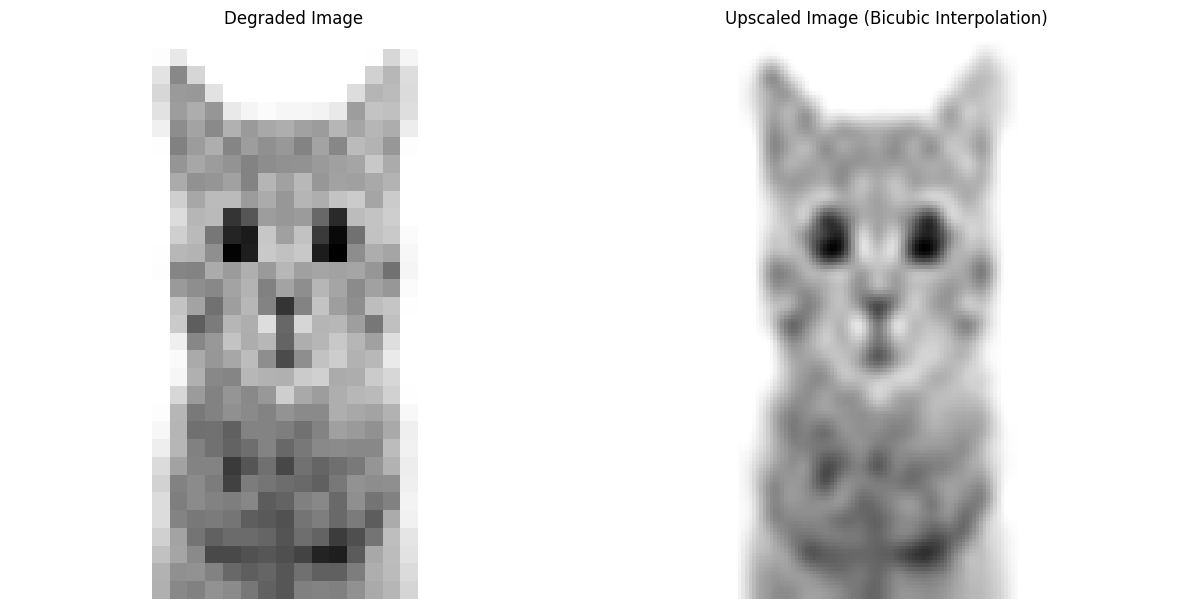

In [30]:
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

axes[0].imshow(resized_image, cmap="gray")
axes[0].set_title("Degraded Image")
axes[0].axis("off")

axes[1].imshow(upscaled_image, cmap="gray")
axes[1].set_title("Upscaled Image (Bicubic Interpolation)")
axes[1].axis("off")

plt.tight_layout()
plt.show()


## **2. Sparse Coding-based Super-Resolution**
### Intuition
This method learns a mapping between low-resolution patches and high-resolution patches using sparse coding. The low-resolution patch is represented as a sparse linear combination of dictionary atoms(dictionary of high-resolution image patches), and Sparse-code the low-resolution patch by finding the few dictionary atoms that best represent it. Make the low resolution patch a sparse linear combination of high resolution patches.

### Mathematics
#### Sparse Representation and Reconstruction of HR Patch

Given a low-resolution patch $y$ and dictionaries $D_l$ (low-res) and $D_h$ (high-res), the sparse representation and reconstruction are computed as follows:

#### Sparse Representation:

$$
\alpha = \arg \min_{\alpha} \left\| y - D_l \alpha \right\|_2^2 + \lambda \left\| \alpha \right\|_1
$$

#### Reconstruct High-Resolution Patch:

$$
x = D_h \alpha
$$

Where:

- **$\alpha$** is the sparse code (the representation of the patch $y$ in the dictionary space).
- **$D_l$ and $D_h$** are the dictionaries corresponding to low-resolution and high-resolution patches, respectively.

---

#### Explanations:

1. **Dictionaries $D_l$ and $D_h$ (Low-Res and High-Res)**:
    - $D_l$ (low-resolution dictionary) consists of a set of low-resolution image patches or atoms that are used to represent the low-resolution input patch $y$.
    - $D_h$ (high-resolution dictionary) contains a set of high-resolution image patches or atoms used to reconstruct the high-resolution patch $x$ from the sparse code $\alpha$.
    - These dictionaries are learned from training data, capturing image features at different resolutions.

2. **What is $\lambda$?**
    - $\lambda$ is a regularization parameter that controls the sparsity of the representation. A higher $\lambda$ encourages a sparser $\alpha$ (fewer non-zero elements), which typically leads to more efficient representations. Lower values of $\lambda$ allow for a denser representation.

3. **How are $D_l$ and $D_h$ learned?**
    - $D_l$ and $D_h$ are learned during the training phase. The learning process generally involves optimization techniques such as K-SVD (K-means Singular Value Decomposition) or other dictionary learning methods. The dictionaries are updated iteratively to best represent the patches in the low- and high-resolution spaces.

4. **What does $y - D_l \alpha$ represent?**
    - In the term $y - D_l \alpha$, **$D_l \alpha$** is the reconstruction of the low-resolution patch from the sparse code $\alpha$. This is obtained by multiplying the low-resolution dictionary $D_l$ by the sparse code $\alpha$. The term $y - D_l \alpha$ represents the error or difference between the actual low-resolution patch $y$ and its sparse approximation $D_l \alpha$.


### [Link to the Github Repo](https://github.com/tingfengainiaini/sparseCodingSuperResolution/tree/master)